#0- Set up & Data Download
https://github.com/ageitgey/face_recognition/blob/master/README_Korean.md

In [1]:
!pip install face_recognition

  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=37fda512e49895cdd5ea8ba2729d802e16ae881b65040d8329f9862c7b429a3a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import cv2 
import os 
import numpy 
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
import face_recognition
from IPython.display import clear_output

#1- 얼굴 탐지 
- 사진, 영상 속에 존재하는 얼굴을 모두 찾음 

##1-1 사진 

In [4]:
#단일 얼굴 탐지 
!wget https://pbs.twimg.com/media/FTuW2-9aIAA4mQS.jpg 
clear_output()

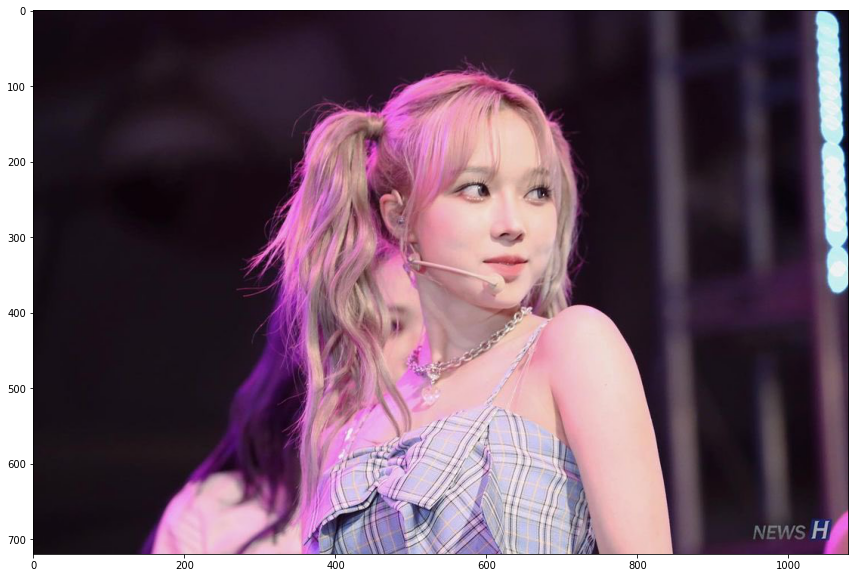

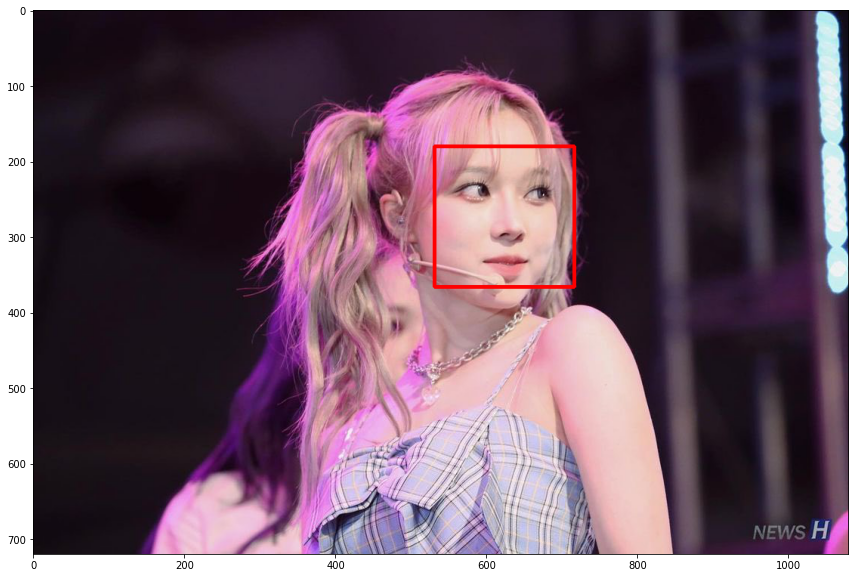

In [5]:
def make_location_img(path):
  #이미지 파일로 부터 load 
  image = face_recognition.load_image_file(path)
  #load 된 이미지로 부터 얼굴 탐지 
  face_locations = face_recognition.face_locations(image)
  #원본 이미지 출력 
  plt.figure(figsize=(20,10))
  plt.imshow(image)
  plt.show()
  #얼굴 탐지한 이미지 출력 
  for face_points in face_locations:
    face_points = {a:b for a,b in zip(['top','right','bottom','left'], list(face_points))}
    image = cv2.rectangle(image,(face_points['left'],face_points['top']),(face_points['right'],face_points['bottom']),(255,0,0),3)
  plt.figure(figsize=(20,10))
  plt.imshow(image)

path = '/content/FTuW2-9aIAA4mQS.jpg'
make_location_img(path)

In [ ]:
#다중 얼굴 탐지 
# !wget https://assets.ey.com/content/dam/ey-sites/ey-com/en_gl/topics/global-review/2019/ey-staff-at-event.jpg #다중 얼굴 탐지 
# clear_output()
path = '/content/ey-staff-at-event.jpg'

make_location_img(path)

## 1-2 영상 
- 약 15분 소요 
- 출력된 영상은 윈도우 기본 플레이어로는 실행이 안됌 (카카오 팟 플레이어 or 곰 플레이어 등 필요) 

In [ ]:
!wget https://github.com/ageitgey/face_recognition/raw/master/examples/hamilton_clip.mp4
clear_output()

In [ ]:
"""
Set_up_output_movie : 영상의 얼굴 탐지 작업 전 세팅 
- length : 영상 길이 
- shape : 영상 해상도 ex : (1920*1080)
- fourcc : 코덱 
- output_movie : 얼굴 탐지 한 영상을 위한 빈 영상 객체 <--- Frame 마다 여기에 입력 됨 
"""
def set_up_output_movie(path):
  input_movie = cv2.VideoCapture(path)
  length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
  ret, frame = input_movie.read()
  shape = np.array(frame.shape)[:2]
  shape = (shape[1],shape[0])
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  output_movie = cv2.VideoWriter('new_'+path.split('.')[0] + '.avi', fourcc, 29.97, shape)
  return output_movie , length 

"""
Frame 마다 얼굴을 찾는 코드
"""
def make_face_locations(frame):
    rgb_frame = frame[:, :, ::-1]
    face_locations = face_recognition.face_locations(rgb_frame) #사진에서 얼굴 위치 탐색 
    for (top, right, bottom, left) in face_locations: #탐색한 얼굴 위치 사진에 표시 
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    return frame 

def make_output_movie(path):
  face_locations = []
  frame_number = 0
  output_movie,length = set_up_output_movie(path)
  input_movie = cv2.VideoCapture(path)
  while True:
    ret,frame = input_movie.read()
    frame_number +=1 
    if not ret:
      break
    frame = make_face_locations(frame)
    
    print("Writing frame {} / {}".format(frame_number, length))
    print(os.path.getsize('new_'+path.split('.')[0]+'.avi'))
    output_movie.write(frame)

#새로운 영상으로 작업할 때 영상을 다운 받은 뒤 Path만 바꿔주면 됨 
path = 'hamilton_clip.mp4'
make_output_movie(path)

# 2- 얼굴 특징 

In [7]:
!wget https://www.the-pr.co.kr/news/photo/201905/42597_64473_2127.png
clear_output()

## 2-1 얼굴 윤곽 

In [ ]:
from PIL import Image, ImageDraw
import face_recognition

#이미지 파일 로드 
path = '/content/42597_64473_2127.png'
image = face_recognition.load_image_file(path)

#이미지로 부터 얼굴 윤곽 추출 
face_landmarks_list = face_recognition.face_landmarks(image)

#추출한 윤곽 이미지에 그림 
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)
        
plt.figure(figsize=(20,8))
plt.imshow(image)
plt.show()
pil_image

##2-1 자동 메이크업 

In [ ]:
# 이미지 파일 로드 
# path = '/content/42597_64473_2127.png'
path = '/content/KakaoTalk_20220604_020852244.jpg'

image = face_recognition.load_image_file(path)

#이미지 파일로 부터 얼굴 윤곽 찾음 
face_landmarks_list = face_recognition.face_landmarks(image)

#얼굴 윤곽 정보로 메이크업 진행 
pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
#원본 이미지 
plt.figure(figsize=(20,8))
plt.imshow(image)
#메이크업 이미지 
plt.show()
pil_image

#3-얼굴 인식 : 사람 식별 
- Known 이미지로 부터 얼굴 추출, 인코딩 진행 
- Unknonw 이미지에서 얼굴 추출하고 Knonw이미지 중 가장 유사한 것 출력 

## 3-1 사진 

In [10]:
!wget http://photo.sentv.co.kr/photo/2021/08/24/20210824093751.jpg 
!wget https://file.mk.co.kr/meet/neds/2022/03/image_readmed_2022_233456_16472225874973831.jpg 
!wget https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/12/PS21121100082.jpg 
!wget https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202202/15/04305286-7fb3-4e92-aace-c6eeb24ad1f5.jpg 
!wget https://pbs.twimg.com/media/FB4TOcGUYAQhlqa.jpg 
clear_output()

In [ ]:
import face_recognition
from PIL import Image, ImageDraw,ImageFont
import numpy as np


#인식하고자 하는 얼굴 이미지 인코딩 
winter_image = face_recognition.load_image_file("/content/FB4TOcGUYAQhlqa.jpg")
karina_image = face_recognition.load_image_file("/content/image_readmed_2022_233456_16472225874973831.jpg")
giselle_image = face_recognition.load_image_file("/content/PS21121100082.jpg")
ningning_image = face_recognition.load_image_file("/content/04305286-7fb3-4e92-aace-c6eeb24ad1f5.jpg")
unknown_image = face_recognition.load_image_file("/content/20210824093751.jpg")

winter_encoding = face_recognition.face_encodings(winter_image)[0]
karina_encoding = face_recognition.face_encodings(karina_image)[0]
giselle_encoding = face_recognition.face_encodings(giselle_image)[0]
ningning_encoding = face_recognition.face_encodings(ningning_image)[0]

#인코딩 된 정보들 리스트화 
known_face_encodings = [
    winter_encoding,
    karina_encoding,
    giselle_encoding,
    ningning_encoding
]
known_face_names = [
                    "Winter",
                    "Karina",
                    "Giselle",
                    "Ningning"
]

#Unknonw 이미지 로드 
unknown_image = face_recognition.load_image_file("/content/20210824093751.jpg")

#Unknown 이미지에서 얼굴 추출 및 인코딩 
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

#이미지를 pil_image 형태로 변형 
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

#Unknow이미지에서 추출한 얼굴과 가장 유사한 것을 찾고 이를 이미지 위에 그림 
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    #유사한 얼굴 찾기 
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    #얼굴에 box 그리기 
    draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0),width=5)

    #매칭된 이름 그리기 
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(255, 0, 0), outline=(255, 0, 0))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

#결과 이미지 출력 
pil_image

## 3-2 영상 
- 약 20분 소요 

In [ ]:
!gdown https://drive.google.com/uc?id=1DP-hdmHqqSzN5pjCGaFwFV82seeuw_0a&export=download
clear_output()

In [ ]:
import face_recognition
import cv2

path = "aespa.mp4"
#위 얼굴 탐지에서 만든 영상 세팅 메서드 사용 
output_movie, length = set_up_output_movie(path)

input_movie = cv2.VideoCapture(path)

#인식할 얼굴 인코딩 
winter_image = face_recognition.load_image_file("/content/FB4TOcGUYAQhlqa.jpg")
karina_image = face_recognition.load_image_file("/content/image_readmed_2022_233456_16472225874973831.jpg")
giselle_image = face_recognition.load_image_file("/content/PS21121100082.jpg")
ningning_image = face_recognition.load_image_file("/content/04305286-7fb3-4e92-aace-c6eeb24ad1f5.jpg")
unknown_image = face_recognition.load_image_file("/content/20210824093751.jpg")

winter_encoding = face_recognition.face_encodings(winter_image)[0]
karina_encoding = face_recognition.face_encodings(karina_image)[0]
giselle_encoding = face_recognition.face_encodings(giselle_image)[0]
ningning_encoding = face_recognition.face_encodings(ningning_image)[0]

known_faces = [
    winter_encoding,
    karina_encoding,
    giselle_encoding,
    ningning_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    #프레임 로드 
    ret, frame = input_movie.read()
    frame_number += 1

    #비디오 종료시 반복 종료 
    if not ret:
        break

    # 프레임 이미지 BGR to RGB 변형 
    rgb_frame = frame[:, :, ::-1]

    #프레임 이미지에서 얼굴 탐지 및 인코딩 
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        #프레임 속 인코딩 된 얼굴과 가장 유사한 것 매칭 
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        #매칭 된 이름 
        name = None
        if match[0]:
            name = "Winter"
        elif match[1]:
            name = "Karina"
        elif match[2]:
            name = "Giselle"
        elif match[3]:
            name = "Ningning"

        face_names.append(name)

    #탐지한 얼굴 box 그리기 및 매칭된 이름 출력 
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # 처리 완료 된 프레임 이미지 비디오로 작성 
    print("Writing frame {} / {}".format(frame_number, length))
    print(os.path.getsize('new_'+path.split('.')[0]+'.avi'))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()

Writing frame 1 / 704
10766
Writing frame 2 / 704
10766
Writing frame 3 / 704
10766
Writing frame 4 / 704
10766
Writing frame 5 / 704
10766
Writing frame 6 / 704
10766
Writing frame 7 / 704
272910
Writing frame 8 / 704
272910
Writing frame 9 / 704
272910
Writing frame 10 / 704
272910
Writing frame 11 / 704
272910
Writing frame 12 / 704
535054
Writing frame 13 / 704
535054
Writing frame 14 / 704
535054
Writing frame 15 / 704
535054
Writing frame 16 / 704
797198
Writing frame 17 / 704
797198
Writing frame 18 / 704
797198
Writing frame 19 / 704
797198
Writing frame 20 / 704
1059342
Writing frame 21 / 704
1059342
Writing frame 22 / 704
1059342
Writing frame 23 / 704
1059342
Writing frame 24 / 704
1059342
Writing frame 25 / 704
1059342
Writing frame 26 / 704
1321486
Writing frame 27 / 704
1321486
Writing frame 28 / 704
1321486
Writing frame 29 / 704
1321486
Writing frame 30 / 704
1321486
Writing frame 31 / 704
1321486
Writing frame 32 / 704
1321486
Writing frame 33 / 704
1321486
Writing fra

In [ ]:
!cp new_aespa.avi /content/drive/MyDrive

#4- Webcam 활용
- Webcam을 활용한 Real-time Face recognition을 위해선 로컬에서 구동시켜야 함 
- 로컬에서 Face_recognition 라이브러리 설치를 위해 가상 환경 세팅 필요 

## 4-1 셋업 (가상환경) 


1. 가상 환경 생성 
- 아나콘다 프롬프트를 실행시킨 뒤 아래 명령어를 통해 가상환경 생성 
```
conda create -n env_dlib python=3.6 
```


2. 가상환경 활성화 및 필요 라이브러리 설치 
- 가상환경 활성화 
```
conda activate env_dlib
```

- 필요 라이브러리 설치 
```
conda install -c conda-forge dlib 
pip install face_recognition
conda install -n env_dlib ipykernel --update-deps --force-reinstall
conda install opencv
```

3. 비쥬얼 코드 or 쥬피터 노트북 실행 

## 4-2 얼굴 탐지 
- Webcam의 영상 속 모든 얼굴을 탐지 함 
- 해당 코드를 쥬피터 노트북 or 비주얼 스튜디오 코드에서 실행 (앞서 설치한 가상환경에서 진행 해야 함) 

In [ ]:
import face_recognition
import cv2
import numpy as np


video_capture = cv2.VideoCapture(0)

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    face_locations = face_recognition.face_locations(rgb_small_frame)

    # Display the results
    for (top, right, bottom, left) in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)


    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

## 4-2 얼굴 인식 
- Known 이미지로 인코딩 된 얼굴만 탐지 함 
- 자신의 이미지를 me.jpg로 저장하거나 또는 "me.jpg"를 변경 시 해당 이미지 속 얼굴을 인식 함 


In [ ]:
import face_recognition
import cv2
import numpy as np


# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

#인식 할 얼굴 
me_image = face_recognition.load_image_file("me.jpg") 
me_face_encoding = face_recognition.face_encodings(me_image)[0]
#더 많은 얼굴을 인식하고 싶을 때 아래 코드를 계속해서 추가하면 됨 
# new_image = face_recognition.load_image_file("new.jpg") 
# new_face_encoding = face_recognition.face_encodings(new_image)[0]


# Create arrays of known face encodings and their names
known_face_encodings = [
    me_face_encoding
    #new_face_encoding : 더 많은 사람을 인식하고 싶을 때 추가 
]
known_face_names = [
    "Me"
    #이름 추가 
]



# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

## 4-3 자동 메이크업

In [ ]:
!wget https://www.the-pr.co.kr/news/photo/201905/42597_64473_2127.png
clear_output()

In [ ]:
def make_up(pil_image,face_landmarks_list):
  for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(0, 0, 255, 128)) #B,G,R,Width
    d.polygon(face_landmarks['bottom_lip'], fill=(0, 0, 255, 128))
    d.line(face_landmarks['top_lip'], fill=(0, 0, 255, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(0, 0, 255, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
  return pil_image


video_capture = cv2.VideoCapture(0)
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
  ret,frame = video_capture.read()
  rgb_frame = frame[:,:,:]
  face_landmarks_list = face_recognition.face_landmarks(rgb_frame)

  pil_image = Image.fromarray(rgb_frame)
  pil_image = make_up(pil_image,face_landmarks_list)
  frame = np.array(pil_image)
  cv2.imshow('video',frame)

  # Hit 'q' on the keyboard to quit!
  if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  # Release handle to the webcam

video_capture.release()
cv2.destroyAllWindows()


